In [1]:
'''
A. Data Engineering
'''

'''
1. Import Libraries for Data Engineering
'''
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
2. Import IMDB Dataset from library
'''

from tensorflow.keras.datasets import imdb

In [3]:
'''
T. TPU Initialization
'''

import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU {}'.format(tpu.cluster_spec().as_dict()['worker']))
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: {}".format(strategy.num_replicas_in_sync))

print('Loading data...')
vocab_size = 20000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
# (X_train, y_train), (X_test, y_test) = imdb.load_data()

Running on TPU ['10.102.226.242:8470']


REPLICAS: 8
Loading data...
17464789/17464789 [==============================] - 0s 0us/step


In [4]:
'''
3. Explore the several features of datasets.
'''
print('Number of reviews for training : {}'.format(len(X_train)))
print('Number of reviews for tesing   : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('Number of Classes : {}'.format(num_classes))

unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency for each label:")
print(np.asarray((unique_elements, counts_elements)))

Number of reviews for training : 25000
Number of reviews for tesing   : 25000
Number of Classes : 2
Frequency for each label:
[[    0     1]
 [12500 12500]]


In [5]:
'''
4. Tokenizer and Vocab define
'''
word_to_index = imdb.get_word_index()
index_to_word={}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

print('Top #1 word in frequency : {}'.format(index_to_word[4]))

print('Top 3938 most frequent words : {}'.format(index_to_word[3941]))

for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[0]]))
print(' '.join([index_to_word[index] for index in X_train[0][:50]]))

1641221/1641221 [==============================] - 0s 0us/step
Top #1 word in frequency : the
Top 3938 most frequent words : suited
<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <unk> is an amazing actor and now the same being director <unk> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <unk> of norman and paul they were just brilliant children are often left out of the praising list i think beca

In [6]:
'''
5. Tokenizer test
'''
lines = [
  "It is winter and the weather is very cold.",
  "Will this Christmas be a white Christmas?",
  "Be careful not to catch a cold in winter and have a happy new year."
]
for line in lines:
    # txt_2_ids = ' '.join([index_to_word[index] for index in line])
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', line).lower()

    # 정수 인코딩
    encoded = []
    for word in new_sentence.split():
        try :
            encoded.append(word_to_index[word]+3)

        # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
        except KeyError:
            encoded.append(2)
    ids_2_txt = ' '.join([index_to_word[index] for index in encoded])
    print("Input     :", line)
    print("txt_2_ids :", encoded)
    print("ids_2_txt :", ids_2_txt,"\n")

Input     : It is winter and the weather is very cold.
txt_2_ids : [12, 9, 3441, 5, 4, 5825, 9, 55, 1043]
ids_2_txt : it is winter and the weather is very cold 

Input     : Will this Christmas be a white Christmas?
txt_2_ids : [80, 14, 982, 30, 6, 428, 982]
ids_2_txt : will this christmas be a white christmas 

Input     : Be careful not to catch a cold in winter and have a happy new year.
txt_2_ids : [30, 4690, 24, 8, 1277, 6, 1043, 11, 3441, 5, 28, 6, 654, 162, 291]
ids_2_txt : be careful not to catch a cold in winter and have a happy new year 



Maximum length of review : 2494
Average length of review : 238.71364


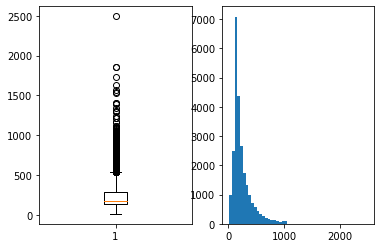

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [7]:
'''
6. Explore the tokenized datasets.
'''
len_result = [len(s) for s in X_train]

print('Maximum length of review : {}'.format(np.max(len_result)))
print('Average length of review : {}'.format(np.mean(len_result)))

plt.subplot(1,2,1)
plt.boxplot(len_result)
plt.subplot(1,2,2)
plt.hist(len_result, bins=50)
plt.show()

print(X_train[0])
print(y_train[0])

batch_size = 32

In [8]:
'''
7. Split Data
'''
# print('Loading data...')
# (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

X_valid = X_test[:20000]
y_valid = y_test[:20000]

X_test = X_test[20000:]
X_pred = X_test
y_test = y_test[20000:]

print(len(X_train), 'train sequences')
print(len(X_valid), 'valid sequences')
print(len(X_test) , 'test sequences')

25000 train sequences
20000 valid sequences
5000 test sequences


In [9]:
'''
8. Pad sequences
'''
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 300  # cut texts after this number of words (among top vocab_size most common words)
X_train = pad_sequences(X_train, maxlen=max_len)
X_valid = pad_sequences(X_valid, maxlen=max_len)
X_test  = pad_sequences(X_test, maxlen=max_len)

In [10]:
# 10. Data type define
# For IMDB dataset set, it is not required.

# 11. Build dataset
# For eager mode, it is done at the "model.fit"

In [11]:
'''
B. Model Engineering
'''

'''
9. Import Libraries for Model Engineering
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import load_model

In [12]:
'''
10. Set Hyperparameters
'''
embedding_dim = 256
hidden_units = 128
EPOCHS = 20
learning_rate = 5e-4

# initialize and compile model within strategy scope
with strategy.scope():
    '''
    11. Build NN model
    '''
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim))
    model.add(LSTM(hidden_units, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))

    '''
    12. Optimizer
    '''
    optimizer = optimizers.Adam(learning_rate=learning_rate)

    '''
    13. Model Compilation - model.compile
    '''
    # model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         5120000   
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5,317,249
Trainable params: 5,317,249
Non-trainable params: 0
_________________________________________________________________


In [13]:
'''
14. EarlyStopping
'''
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

In [14]:
'''
15. ModelCheckpoint
'''
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [15]:
'''
16. Train and Validation - `model.fit`
'''
history = model.fit(X_train, y_train, epochs = EPOCHS, validation_data = (X_valid, y_valid), callbacks=[es, mc])

Epoch 1/20
782/782 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8097
Epoch 1: val_accuracy improved from -inf to 0.86500, saving model to best_model.h5
782/782 [==============================] - 72s 77ms/step - loss: 0.4142 - accuracy: 0.8097 - val_loss: 0.3264 - val_accuracy: 0.8650
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.9094
Epoch 2: val_accuracy improved from 0.86500 to 0.86765, saving model to best_model.h5
782/782 [==============================] - 56s 72ms/step - loss: 0.2401 - accuracy: 0.9094 - val_loss: 0.3187 - val_accuracy: 0.8676
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.1666 - accuracy: 0.9391
Epoch 3: val_accuracy did not improve from 0.86765
782/782 [==============================] - 56s 71ms/step - loss: 0.1666 - accuracy: 0.9391 - val_loss: 0.3858 - val_accuracy: 0.8546
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 0.1083 - accuracy: 0.96

In [16]:
'''
17. Assess model performance
'''
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

157/157 [==============================] - 10s 60ms/step - loss: 0.3152 - accuracy: 0.8692

 테스트 정확도: 0.8692


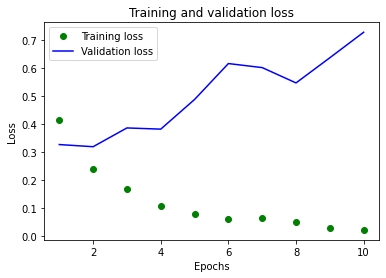

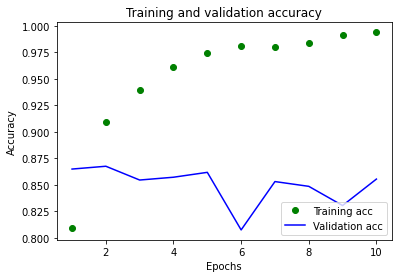

In [17]:
'''
18. [Opt] Plot Loss and Accuracy
'''
history_dict = history.history
history_dict.keys()

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'o', color='g', label='Training loss')   # 'bo'
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


plt.plot(epochs, acc, 'o', color='g', label='Training acc')   # 'bo'
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [18]:
'''
19. [Opt] Training result test for Code Engineering
'''
def sentiment_predict(new_sentence):
    # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
    new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()

    # 정수 인코딩
    encoded = []
    for word in new_sentence.split():
        try :
            # 단어 집합의 크기를 10,000으로 제한.
            if word_to_index[word] <= vocab_size:
                encoded.append(word_to_index[word]+3)
            else:
            # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
                encoded.append(2)
        # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
        except KeyError:
            encoded.append(2)

    pad_sequence = pad_sequences([encoded], maxlen=max_len) # 패딩
    score = float(loaded_model.predict(pad_sequence)) # 예측

    if(score > 0.5):
        print("A positive review with a {:.2f}% chance. ".format(score * 100))
    else:
        print("A negative review with a {:.2f}% chance. ".format((1 - score) * 100))

for idx in range(10):
    print('----'*30)
    test_input = ' '.join([index_to_word[index] for index in X_pred[idx]])
    print("Test sentence from datasets:\n", test_input)
    sentiment_predict(test_input)
    if(y_test[idx] > 0.5):
        print("Ground truth is positive!")
    else:
        print("Ground truth is negative!")

------------------------------------------------------------------------------------------------------------------------
Test sentence from datasets:
 <sos> the concept of this movie is pretty compelling zombie children climbing out of an abandoned mine to seek revenge for their deaths in the backwoods of <unk> cool the problem i had with the movie is the lack of creativity when dealing with the zombies the makers could have really spiced this film up with some terror like imagery a la the ring such as stop action reverse camera walking or stuff like that when the zombie children are <unk> through the woods they look like a bunch of 9 year olds walking to a playground in west philadelphia instead of pick <unk> and <unk> they could have easily been carrying baseball bats and gloves why would i fear these little kids anyone could just run away in a straight line to safety also who in their right mind would have stayed one night with their children in that creepy run down house the moment